# AAN
## forestfires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\ANN\forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
len(df.value_counts('month'))

12

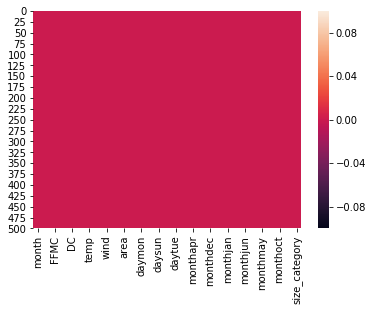

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.value_counts('month')

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [7]:
df['y'] = lb.fit_transform(df['size_category'])


In [8]:
df = df.drop('day',axis=1)


In [9]:
df = df.drop('size_category',axis=1)

In [10]:
df = pd.get_dummies(df)

In [11]:
df.head().T

,0,1,2,3,4
FFMC,86.2,90.6,90.6,91.7,89.3
DMC,26.2,35.4,43.7,33.3,51.3
DC,94.3,669.1,686.9,77.5,102.2
ISI,5.1,6.7,6.7,9.0,9.6
temp,8.2,18.0,14.6,8.3,11.4
RH,51.0,33.0,33.0,97.0,99.0
wind,6.7,0.9,1.3,4.0,1.8
rain,0.0,0.0,0.0,0.2,0.0
area,0.0,0.0,0.0,0.0,0.0
dayfri,1.0,0.0,0.0,1.0,0.0


In [12]:
# remove duplicate columns
df=df.T.drop_duplicates().T

In [13]:
X = df.drop('y',axis=1).values
y = df['y'].values


### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [17]:
X_train.shape

(387, 28)

In [18]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=28,activation='relu'))

model.add(Dense(units=14,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
13/13 [==============================] - 0s 19ms/step - loss: 3.4633 - val_loss: 1.5932
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.8018 - val_loss: 0.5459
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4343 - val_loss: 0.3152
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3594 - val_loss: 0.3190
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.2707 - val_loss: 0.2471
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.2315 - val_loss: 0.2382
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.2246 - val_loss: 0.2210
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.2109 - val_loss: 0.2096
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.2141 - val_loss: 0.2054
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1987 - val_loss: 0.2136
Epoch 11

13/13 [==============================] - 0s 5ms/step - loss: 0.0584 - val_loss: 0.0636
Epoch 84/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0609 - val_loss: 0.0646
Epoch 85/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0562 - val_loss: 0.0700
Epoch 86/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0561 - val_loss: 0.0763
Epoch 87/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0766 - val_loss: 0.1190
Epoch 88/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0761 - val_loss: 0.0667
Epoch 89/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0668 - val_loss: 0.0694
Epoch 90/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0646 - val_loss: 0.0676
Epoch 91/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0572 - val_loss: 0.0582
Epoch 92/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0546 - val_loss: 0.0703
Epoch 93/600


13/13 [==============================] - 0s 4ms/step - loss: 0.1088 - val_loss: 0.0375
Epoch 246/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0574 - val_loss: 0.0261
Epoch 247/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1489 - val_loss: 0.2083
Epoch 248/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0618 - val_loss: 0.0299
Epoch 249/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - val_loss: 0.0270
Epoch 250/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0507 - val_loss: 0.0279
Epoch 251/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0269
Epoch 252/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1127 - val_loss: 0.0332
Epoch 253/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0391 - val_loss: 0.0406
Epoch 254/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0472 - val_loss: 0.0555
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0581 - val_loss: 0.0224
Epoch 327/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.0213
Epoch 328/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.0231
Epoch 329/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.0552
Epoch 330/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - val_loss: 0.0194
Epoch 331/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0359
Epoch 332/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0253 - val_loss: 0.0387
Epoch 333/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.0263
Epoch 334/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.0202
Epoch 335/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0224 - val_loss: 0.0265
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0431
Epoch 489/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.0481
Epoch 490/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.0407
Epoch 491/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.0416
Epoch 492/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0120 - val_loss: 0.0446
Epoch 493/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0168 - val_loss: 0.0447
Epoch 494/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0405 - val_loss: 0.0522
Epoch 495/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0124 - val_loss: 0.0565
Epoch 496/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.0461
Epoch 497/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0519
Epoc

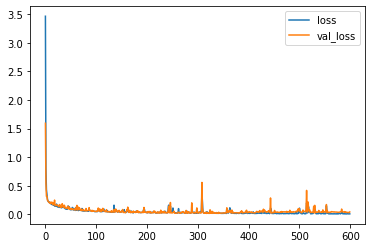

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [21]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        39
         1.0       1.00      0.98      0.99        91

    accuracy                           0.98       130
   macro avg       0.98      0.99      0.98       130
weighted avg       0.99      0.98      0.98       130



In [22]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [25]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 12ms/step - loss: 24.6374 - val_loss: 13.5919
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 6.9406 - val_loss: 4.7378
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 3.9812 - val_loss: 4.2025
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 2.6532 - val_loss: 2.0190
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 1.6508 - val_loss: 1.0586
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.7539 - val_loss: 0.4886
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4280 - val_loss: 0.4727
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3401 - val_loss: 0.4140
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.2920 - val_loss: 0.4082
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3371 - val_loss: 0.4408
Epoch 

Epoch 83/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1064 - val_loss: 0.1829
Epoch 84/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1226 - val_loss: 0.1511
Epoch 85/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0663 - val_loss: 0.0928
Epoch 86/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0602 - val_loss: 0.1260
Epoch 87/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0767 - val_loss: 0.1162
Epoch 88/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0712 - val_loss: 0.1000
Epoch 89/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1509 - val_loss: 0.1056
Epoch 90/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0765 - val_loss: 0.0903
Epoch 91/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0586 - val_loss: 0.0917
Epoch 92/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0608 - val_loss: 0.0898


13/13 [==============================] - 0s 5ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 246/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0263 - val_loss: 0.0384
Epoch 247/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0304 - val_loss: 0.0376
Epoch 248/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0302 - val_loss: 0.0396
Epoch 249/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0281 - val_loss: 0.0357
Epoch 250/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.0356
Epoch 251/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0373 - val_loss: 0.0449
Epoch 252/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.0354
Epoch 253/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.0471
Epoch 254/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - val_loss: 0.0818
Epoc

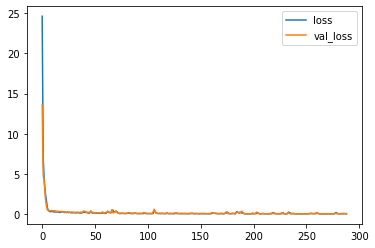

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [27]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        39
         1.0       0.96      1.00      0.98        91

    accuracy                           0.97       130
   macro avg       0.98      0.95      0.96       130
weighted avg       0.97      0.97      0.97       130

